In [31]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_train_full.shape

(60000, 28, 28)

In [5]:
x_train_full.dtype

dtype('uint8')

In [6]:
# Valid = 유효한
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.0

In [7]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
class_names[y_train[0]]

'Coat'

## 스퀸셜 API를 사용하여 모델 만들기

In [9]:
# # Dence = 밀집한, Flatten = 납작해지다
# # 모델 생성
# model = keras.models.Sequential()
# # 1D 배열로 변환한다. X 데이터를 받으면 reshape(-1, 1) 
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# # 300개의 히든레이아웃 생성
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
# 리스트로 한번에 제작이 가능하다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [11]:
# 모든 층을 출력함
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

In [15]:
weights, biases = hidden1.get_weights()

In [16]:
weights

array([[-0.00786129, -0.04643705, -0.00400778, ...,  0.03642043,
         0.01575407,  0.01260051],
       [-0.06120645,  0.00693961, -0.04982673, ..., -0.03669927,
         0.05820207, -0.00561373],
       [ 0.01660206, -0.02350342,  0.04038047, ..., -0.05355654,
         0.01577628, -0.04358425],
       ...,
       [-0.02075107, -0.0666063 , -0.06453127, ...,  0.02280437,
        -0.0442384 , -0.0331777 ],
       [-0.03945303, -0.01962216,  0.07079045, ...,  0.00790332,
         0.00073474,  0.04608174],
       [ 0.0430558 , -0.04700643, -0.07198154, ...,  0.03152253,
        -0.01952074, -0.01749045]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

In [58]:
# Model Compiler
model.compile(
#               loss = keras.losses.sparse_categorical_crossentropy,
              loss='sparse_categorical_crossentropy',
              # optimizer = 'SGD',
              optimizer = keras.optimizers.SGD(lr = 1e-5),
#               metrics = [keras.metrics.sparse_categorical_accuracy]
              metrics=['accuracy']
)

In [41]:
# model Training and Evalution
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 36us/sample - loss: 0.1351 - accuracy: 0.9491 - val_loss: 0.3484 - val_accuracy: 0.8854
Epoch 2/30
55000/55000 [==============================] - 2s 32us/sample - loss: 0.1221 - accuracy: 0.9546 - val_loss: 0.3386 - val_accuracy: 0.8882
Epoch 3/30
55000/55000 [==============================] - 2s 32us/sample - loss: 0.1138 - accuracy: 0.9584 - val_loss: 0.3324 - val_accuracy: 0.8900
Epoch 4/30
55000/55000 [==============================] - 2s 32us/sample - loss: 0.1083 - accuracy: 0.9612 - val_loss: 0.3282 - val_accuracy: 0.8926
Epoch 5/30
55000/55000 [==============================] - 2s 32us/sample - loss: 0.1043 - accuracy: 0.9627 - val_loss: 0.3253 - val_accuracy: 0.8944
Epoch 6/30
55000/55000 [==============================] - 2s 32us/sample - loss: 0.1014 - accuracy: 0.9640 - val_loss: 0.3232 - val_accuracy: 0.8954
Epoch 7/30
55000/55000 [==============================] -

In [36]:
# Training Epochs
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [42]:
# Training Parmametor
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [43]:
history.history

{'loss': [0.1351417988321998,
  0.12209425744224678,
  0.11383775660964576,
  0.1082603420631452,
  0.10431533219191161,
  0.10142096235183153,
  0.09921341506513683,
  0.0974790941531008,
  0.09608082214241678,
  0.09492298237166621,
  0.09394789831692522,
  0.09311068830354648,
  0.09237823601039973,
  0.09172740855650469,
  0.09114274119382555,
  0.09061333394348621,
  0.09012749590115114,
  0.08967939920371229,
  0.08926524424187161,
  0.08887997255542061,
  0.08851944898990068,
  0.08817991973540999,
  0.087860434757444,
  0.08755863007130948,
  0.08727227465252985,
  0.08700137268873778,
  0.08674315288256515,
  0.08649629568267952,
  0.08626030696305362,
  0.08603402071188797],
 'accuracy': [0.94914544,
  0.9545818,
  0.9584,
  0.9612,
  0.96272725,
  0.96401817,
  0.9650364,
  0.9660364,
  0.9664364,
  0.9667636,
  0.96736366,
  0.96778184,
  0.9681091,
  0.96854544,
  0.9688182,
  0.9692909,
  0.9696364,
  0.9699636,
  0.9699818,
  0.97023636,
  0.97032726,
  0.97047275,
  0.9

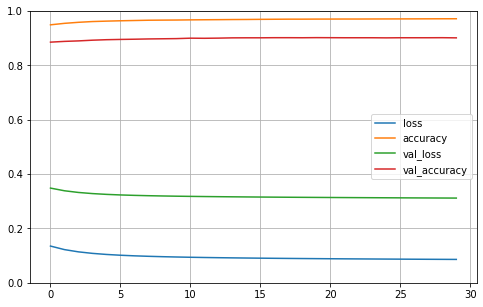

In [44]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 17us/sample - loss: 0.3219 - accuracy: 0.8874


[0.3219098321259022, 0.8874]

In [28]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
y_pred = model.predict_classes(x_new)
y_pred

array([9, 2, 1], dtype=int64)

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)